## 0. Importando Bibliotecas

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from datetime import datetime
import itertools
from itertools import permutations

## 1. Definindo cenários

### 1.1. Define 3 matrizes para problema

#### Matriz Extra Simples

In [2]:
row_1 = [0, 0, 0]
row_2 = [0, 0, 0]
row_3 = [0, -100, 0.5]
row_4 = [0, 0.5, 0.9]

matrix_extra_simple = np.matrix([row_1, row_2, row_3, row_4])

#### Matriz Simples

In [3]:
row_1 = [0, 0, 0, 0, 0]
row_2 = [0, 0, 0, 0, 0]
row_3 = [0, 0, -100, 0.5, 0.5]
row_4 = [0, 0, 0.5, 0.9, 0.9]
row_5 = [0, 0, 0.5, 0.9, 0.9]

matrix_simple = np.matrix([row_1, row_2, row_3, row_4, row_5])

#### Matriz Média

In [4]:
row_1 = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5]
row_2 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.6]
row_3 = [0, 0, 0, 0, 0, -100, 0.6, 0.7]
row_4 = [0, 0, -100, 0, 0, 0.5, 0.6, 0.7]
row_5 = [0, 0, 0, 0, 0, 0.5, 0.9, 0.9]
row_6 = [0, 0, 0, 0, 0, 0.5, 0.9, 0.9]
row_7 = [0, 0, 0, 0, -100, 0.5, 0.9, 0.9]
row_8 = [0, -100, 0, 0, 0, 0.5, 0.9, 0.9]

matrix_medium = np.matrix([row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8])

#### Matriz Complexa

In [5]:
row_1 = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
row_2 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
row_3 = [0, 0, 0, 0, 0, -100, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
row_4 = [0, 0, -100, 0, 0, 0.5, 0.6, 0.7, 0.8, -100, 0.8, 0.8, 0.8]
row_5 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_6 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_7 = [0, 0, 0, 0, -100, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_8 = [0, -100, 0, 0, 0, 0.5, 0.6, 0.7, -100, 0.8, 0.8, 0.8, 0.8]
row_9 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]

matrix_complex = np.matrix([row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8, row_9])

### 1.2. Plota Matrizes

#### Plota Matriz Extra Simples

<Axes: >

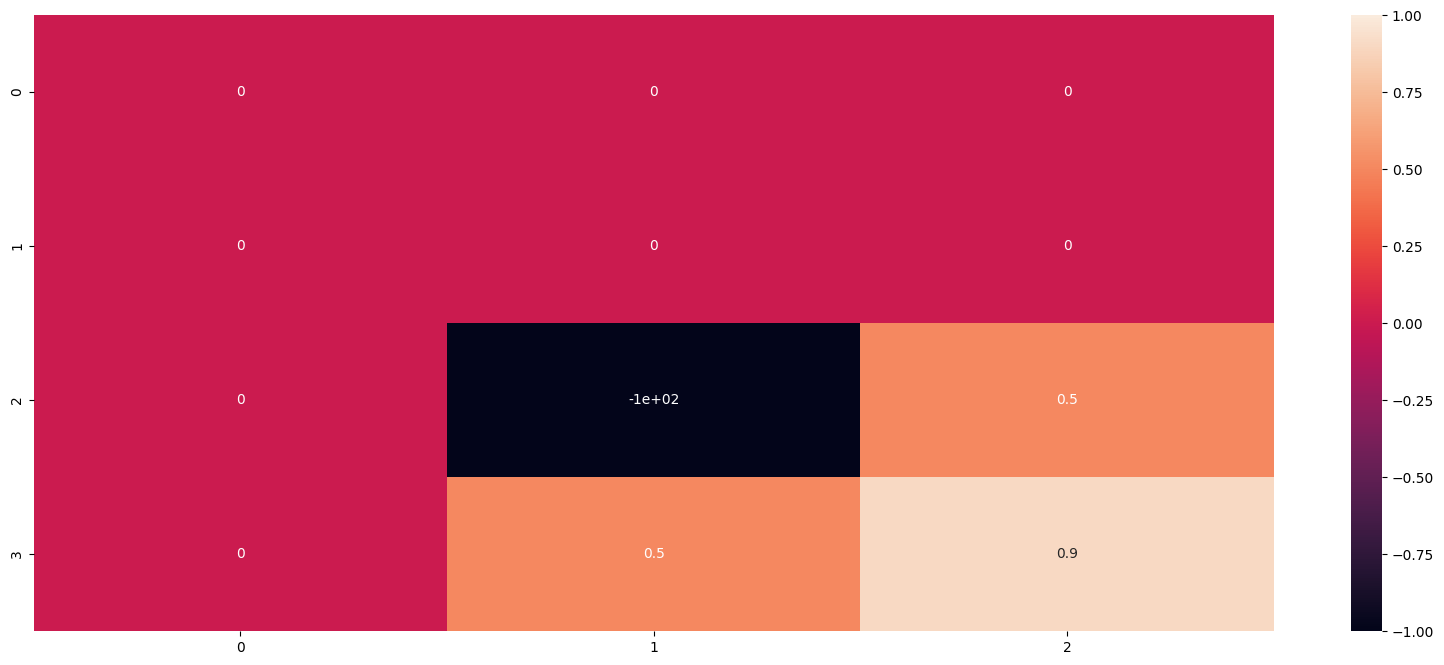

In [6]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_extra_simple, vmin=-1, vmax=1, annot=True)

#### Plota Matriz Simples

<Axes: >

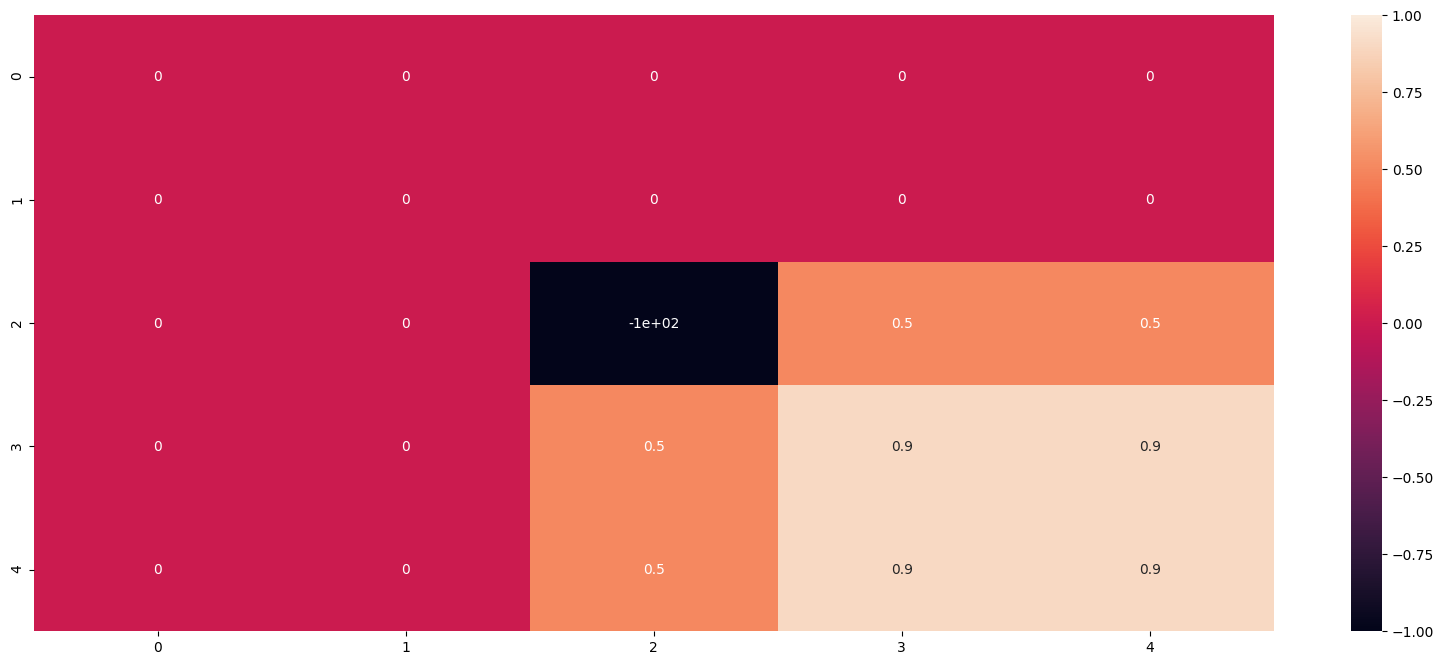

In [7]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_simple, vmin=-1, vmax=1, annot=True)

#### Plota Matriz Média

<Axes: >

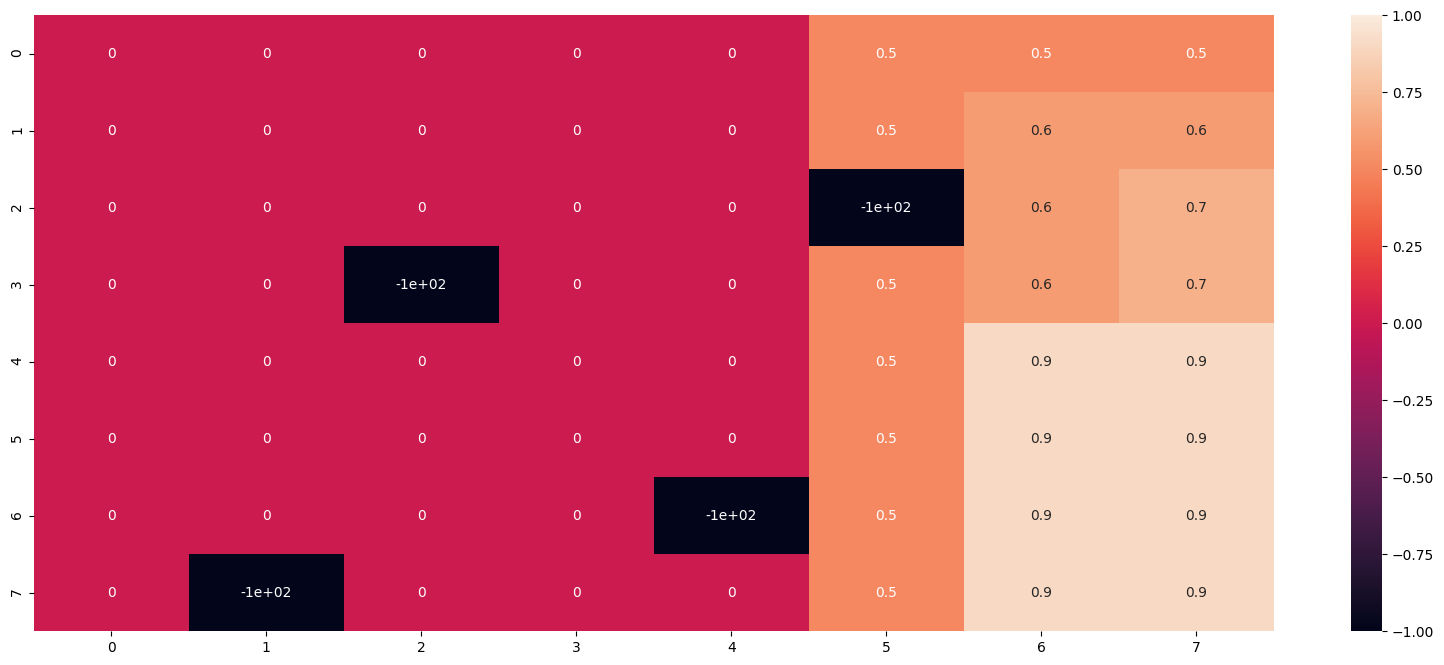

In [8]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_medium, vmin=-1, vmax=1, annot=True)

#### Plota Matriz Complexa

<Axes: >

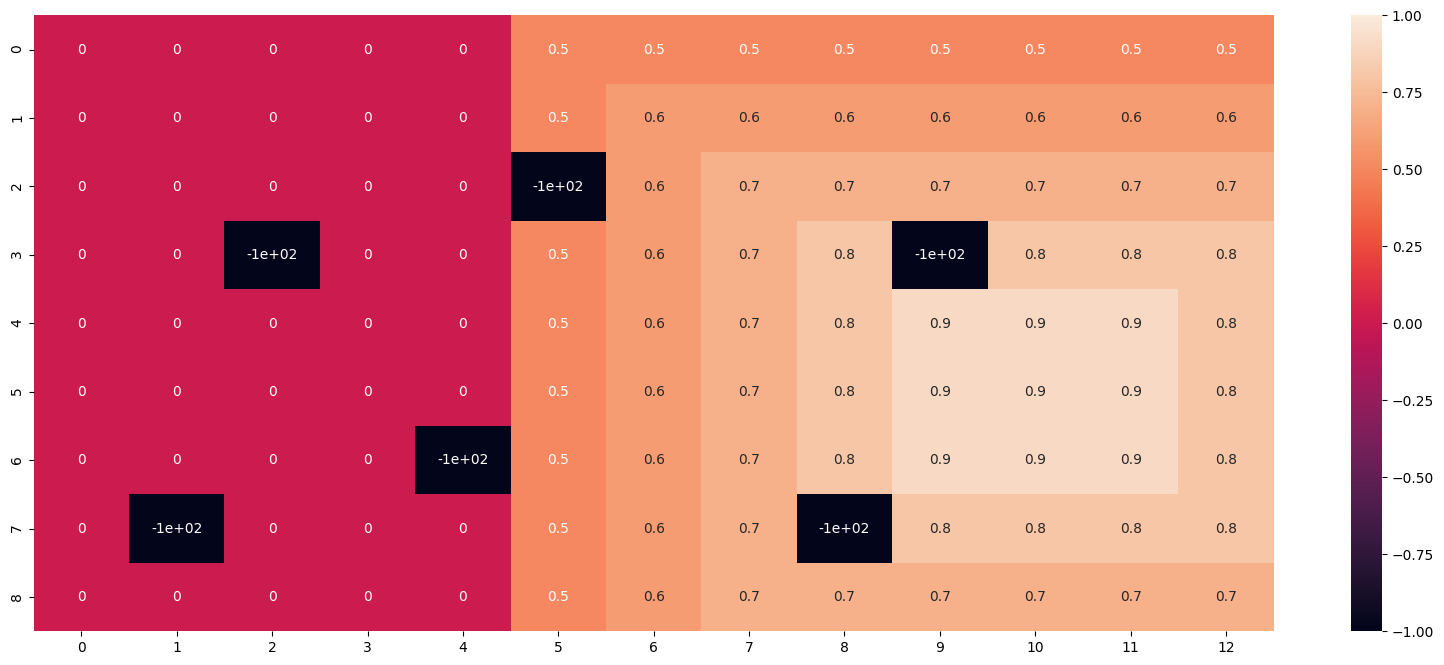

In [9]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_complex, vmin=-1, vmax=1, annot=True)

## 2. Define Classes de Estado e Agente

In [10]:
# global variables
'''MATRIX_GAME = matrix_simple
START = (0, 0)
DETERMINISTIC = True'''

'MATRIX_GAME = matrix_simple\nSTART = (0, 0)\nDETERMINISTIC = True'

In [15]:
class State:
    # Inicializa estado do jogo
    def __init__(self, state, matrix_game):

        # Matriz inicial de recompensas:
        self.ini_reward_matrix = matrix_game

        # Cria tabuleiro zerado com quantidade de colunas e linhas determinado
        self.board = np.zeros([self.ini_reward_matrix.shape[0], self.ini_reward_matrix.shape[1]])

        # Define locais com obstaculos
        i=0
        while i<= self.ini_reward_matrix.shape[0]-1:
            j=0
            while j <= self.ini_reward_matrix.shape[1]-1:
                if self.ini_reward_matrix[i, j]==-100:
                    self.board[i, j]=-100
                j+=1
            i+=1

        # Define o estado do jogo atual. Inicialmente é igual ao parâmetro START
        self.state = state

        # Define variável de termino do jogo como False
        self.isEnd = False

    # Caso perca ou ganhe o jogo, atualiza o estado para fim
    def isEndFunc(self, count):
        if count == 0:
            self.isEnd = True

    # Verifica posição na matriz com base na ação
    def nxtPosition(self, action):
        """
        action: up, down, left, right

        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        if action == "up":
            nxtState = (self.state[0] - 1, self.state[1])
        elif action == "down":
            nxtState = (self.state[0] + 1, self.state[1])
        elif action == "left":
            nxtState = (self.state[0], self.state[1] - 1)
        else:
            nxtState = (self.state[0], self.state[1] + 1)

        # Se estado é legal, próximo estado, caso contrário, permanece no mesmo
        if (nxtState[0] >= 0) and (nxtState[0] <= (self.ini_reward_matrix.shape[0] -1)):
            if (nxtState[1] >= 0) and (nxtState[1] <= (self.ini_reward_matrix.shape[1] -1)):
                if self.board[nxtState]!= -100:
                    return nxtState
        return self.state

    # Mostra tabuleiro
    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, self.ini_reward_matrix.shape[0]):
            print('-----------------')
            out = '| '
            for j in range(0, self.ini_reward_matrix.shape[1]):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -100:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                if self.ini_reward_matrix[i,j]>0:
                    token = 't'
                out += token + ' | '
            print(out)
        print('-----------------')
    # Mostra tabuleiro
    def showMatrix(self):
        sns.heatmap(self.ini_reward_matrix, vmin=-1, vmax=1, annot=True)
        

# Agent of player

class Agent:

    def __init__(self, matrix_game, start, lr, gamma, d_f, exp_rate, max_exp_rate, min_exp_rate, decay_rate, max_steps):

        # Define iníco do jogo
        self.start=start

        # Matriz inicial com recompensas pré definidas:
        self.ini_reward_matrix = matrix_game

        # Contador de números maiores que 0 que ainda não foram percorridos
        self.count = (self.ini_reward_matrix[self.ini_reward_matrix>0]).shape[1]

        # Inicializa vetor de estados
        self.states = [self.start]

        # Recompensa Total
        self.total_reward = 0

        # Inicializa vetor de ações
        self.actions = ["up", "down", "left", "right"]

        # Inicializa classe estado
        self.State = State(state=self.start, matrix_game=matrix_game)

        # Define lr e exp_rate
        self.lr = lr # Learning Rate: Grau de atualização de peso para estado/ação atual
        self.gamma = gamma # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
        self.d_f = d_f # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos

        # Exploration parameters
        self.exp_rate = exp_rate # Exploration rate
        self.max_exp_rate = max_exp_rate # Exploration probability at start
        self.min_exp_rate = min_exp_rate # Minimum exploration probability 
        self.decay_rate = decay_rate # Exponential decay rate for exploration prob
        self.max_steps = max_steps # Qtd de passos até jogo ser finalizado

        # Inicializa tabela Q
            # Cria listas para cada item da coluna e da linha e combina cada item em tuplas:
        unique_combinations=list(itertools.product(np.arange(0, self.ini_reward_matrix.shape[0], 1), np.arange(0, self.ini_reward_matrix.shape[1], 1)))
            # Cria tabela q zerada:
        self.qtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[1]*self.ini_reward_matrix.shape[0], len(self.actions))),
                                    index=unique_combinations, columns=self.actions)

        #Inicializa tabela R
            # Cria tabela de recompensas imediatas zerada:
        self.rtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[1]*self.ini_reward_matrix.shape[0], len(self.actions))),
                                    index=unique_combinations, columns=self.actions)
            # Enriquece tabela r com recompensas imediatas pre definidas:
        for position in self.rtable.index:
            #up
            if position[0]!=0: #Se movimento for valido
                self.rtable.loc[position, 'up'] = self.ini_reward_matrix[position[0]-1, position[1]]
            #down
            if position[0]<self.ini_reward_matrix.shape[0]-1: #Se movimento for valido
                self.rtable.loc[position, 'down'] = self.ini_reward_matrix[position[0]+1, position[1]]
            #right
            if position[1]<self.ini_reward_matrix.shape[1]-1: #Se movimento for valido
                self.rtable.loc[position, 'right'] = self.ini_reward_matrix[position[0], position[1]+1]
            #left
            if position[1]!=0: #Se movimento for valido
                self.rtable.loc[position, 'left'] = self.ini_reward_matrix[position[0], position[1]-1]

        # Cria tabela de função de valor zerada:
        self.vtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[0], self.ini_reward_matrix.shape[1])))

        # Vetor com recompensas. Inicializa com recompensa referente ao início do jogo
        self.rewards = [float(self.ini_reward_matrix[self.start])]

        # Listas em que serão armazenadas principais informações, para posteriormente criar arquivo csv
        self.game_list = []
        self.time_steps_list = []
        self.time_list = []
        self.states_list = []
        self.total_rewards_list = []
        self.rewards_list = []
        self.vtable_list = []
        self.qtable_list = []
        self.state_reward_list = []
        self.exp_rate_lst = []

        # Inicializa tempo
        self.t1=time.time()

        # Seta parametro inicial de fim de jogo para False
        self.isEnd = False

    # Escolhe uma ação
    def chooseAction(self):
        # Inicializa variáveis
        mx_nxt_reward = 0
        action = ""

        # Se valor aleatório for menor que taxa de exp_rate escolhida, escolhe ação aleatória
        if np.random.uniform(0, 1) <= self.exp_rate:
            # Escolhe ação aleatória
            action = np.random.choice(self.actions)

        # Caso contrário, escolhe ação de acordo com estado com maior valor
        else:
            # Seleciona ação que maximiza tabela Q
            # Greedy action
            mx_nxt_reward=0
            for a in self.actions:
                # verifica estado com maior valor e seleciona ação correspondente
                nxt_reward = float(self.qtable.loc[[self.State.state]][a])
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward

        # Caso tenham duas ou mais ações empatadas com maior valor, escolhe uma aleatoriamente
            equal_actions=[]
            for a in self.actions:
                # Verifica estado com maior valor e seleciona ação correspondente
                nxt_reward = float(self.qtable.loc[[self.State.state]][a])
                if nxt_reward == mx_nxt_reward:
                    equal_actions.append(a)
            action = np.random.choice(equal_actions)
        return action

    # Realiza ação
    def takeAction(self, action):
        # Altera posição atual com base na ação tomada
        position = self.State.nxtPosition(action)

        # Retorna a posição atual, depois de realizar ação
        return State(state=position, matrix_game=self.ini_reward_matrix)
    
    def isEndFunc(self, steps):
        # Caso estado atual seja maior que 0 e ainda não tenha sido percorrido, reduz contador em 1
        if (self.State.state not in self.states[:-1]) and (self.ini_reward_matrix[self.State.state]>0):
            self.count-=1

        # Se contador é igual a zero, jogo termina
        if self.count == 0:
            self.isEnd = True

        # Se quantidade de passos chegar a 0, jogo termina
        if steps==self.max_steps:
            self.isEnd = True
    # Update Q table
    def updateQtable(self, action):
        # Caso já tenha passado por esse estado previamente, considera recompensa como zero
        if self.State.nxtPosition(action) in (self.states):
            r=0
        else:
            # Realiza update na tabela Q usando recompensa descontada pela quantidade de passos realizados
            r = float(self.rtable.loc[[self.State.state]][action])*(self.d_f**(len(self.states)-1))

        # Realiza update no vetor de recompensas
        self.rewards.append(r)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        self.qtable.at[self.State.state, action] = self.qtable.loc[[self.State.state]][action]+ \
                                            self.lr * (r + self.gamma * np.max(self.qtable.loc[[self.State.nxtPosition(action)]].values) - \
                                                self.qtable.loc[[self.State.state]][action])

    def calculateValuefunc(self):
        # Cria tabela com função de valor zerada
        self.vtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[0], self.ini_reward_matrix.shape[1])))

        # Enriquece tabela de função de valor com valores máximos da tabela q
        for row in self.qtable.index:
            self.vtable.at[row[0], row[1]] = np.max(self.qtable.loc[[row]].values)
        return self.vtable
    
    # Reinicia o jogo
    def reset(self):
        # Reinicia listas de estados percorridos e recompesas 
        self.states = [self.start]
        self.rewards = [float(self.ini_reward_matrix[self.start])]
        self.state_reward_dict=[]
        self.total_reward = 0
        #Reinicia classe de estado
        self.State = State(state=self.start, matrix_game=self.ini_reward_matrix)
        # Reinicia contador de números maiores que 0 que ainda não foram percorridos
        self.count = (self.ini_reward_matrix[self.ini_reward_matrix>0]).shape[1]
        # Reinicia tempo de cada jogo
        self.t1 = time.time()

        self.isEnd = False

    # Salva informações de cada jogo em listas
    def save_info(self, i, time):

        # Armazena número do jogo em lista
        self.game_list.append(i)

        # Armazena quantidade de passos percorridos em lista
        self.time_steps_list.append(len(self.states))

        # Armazena tempo total de cada jogo em lista
        self.time_list.append(time)

        # Armazena lista de estados percorridos em lista
        self.states_list.append(self.states)

        # Armazena recompensa total do jogo em lista
        self.total_rewards_list.append(np.sum(self.rewards))

        # Armazena recompensas de cada estado em lista
        self.rewards_list.append(self.rewards)

        # Armazena vtable em lista 
        self.vtable_list.append(self.calculateValuefunc().to_dict('dict'))

        # Armazena tabela Q em lista
        self.qtable_list.append(self.qtable.to_dict('dict'))

        # Armazena cada par de estado/recompensa em lista de listas
        self.state_reward_dict = list(zip(self.states, self.rewards))
        self.state_reward_list.append(self.state_reward_dict)

        # Armazena exp_rate atual
        self.exp_rate_lst.append(self.exp_rate)

    def generate_result_file(self, rounds, steps):

        # Cria dataframe e armazena listas com info de cada jogo em colunas
        arquivo_final = pd.DataFrame()
        arquivo_final['JOGO'] = self.game_list
        arquivo_final['TIMESTEPS'] = self.time_steps_list
        arquivo_final['TIME'] = self.time_list
        arquivo_final['STATES'] = self.states_list
        arquivo_final['REWARDS'] = self.rewards_list
        arquivo_final['STATES_REWARDS'] = self.state_reward_list      
        arquivo_final['TOTAL REWARDS'] = self.total_rewards_list
        arquivo_final['Vtable'] = self.vtable_list
        arquivo_final['Qtable'] = self.qtable_list
        arquivo_final['exp_rate'] = self.exp_rate_lst

        # date_time atual
        date_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

        # Cria arquivo com parametros do problema
        arquivo_parametros = pd.DataFrame(data={
                                            'parameter name': ['lr',
                                                                'gamma',
                                                                'd_f',
                                                                'exp_rate',
                                                                'max_exp_rate',
                                                                'min_exp_rate',
                                                                'decay_rate',
                                                                'dimensions',
                                                                'date',
                                                                'rounds',
                                                                'steps'],
                                            'parameter': [self.lr,
                                                            self.gamma,
                                                            self.d_f,
                                                            self.exp_rate,
                                                            self.max_exp_rate,
                                                            self.min_exp_rate,
                                                            self.decay_rate,
                                                            str(self.ini_reward_matrix.shape[0])+' x '+str(self.ini_reward_matrix.shape[1]),
                                                            date_time,
                                                            rounds,
                                                            steps]
})

        # Exporta resultado para arquivo csv
        with pd.ExcelWriter(f'Resultado_RL_Q_Learning/results_q_learn_dim_{self.ini_reward_matrix.shape[0]}x{self.ini_reward_matrix.shape[1]}_{date_time}.xlsx') as writer:  
            arquivo_final.to_excel(writer, sheet_name='results')
            arquivo_parametros.to_excel(writer, sheet_name='parameters')
        #arquivo_final.to_excel(f'Resultado_RL_Q_Learning/results_q_learn_dim_{self.ini_reward_matrix.shape[0]}x{self.ini_reward_matrix.shape[1]}_{date_time}.xlsx', sheet_name='results')

    def play(self, rounds=10):
        # Inicializa contador de jogos
        i = 0

        # Joga n partidas
        while i < rounds:
            
            if self.isEnd==False:

                # Escolhe uma ação
                action = self.chooseAction()

                #Update na tabela Q
                self.updateQtable(action)

                # appenda no vetor de estados
                self.states.append(self.State.nxtPosition(action))

                # Realiza a ação, atualiza o estado
                self.State = self.takeAction(action)

                # Define quantidade de passos como tamanho do vetor estado
                steps=len(self.states)

                # Reduz contador caso estado atual>0. Caso contador=0, jogo termina
                self.isEndFunc(steps)

            if self.isEnd==True:
                print('exp_rate: ',self.exp_rate)
                print('total reward: ', np.sum(self.rewards))
                print('steps: ', len(self.states))
                # Reduce epsilon (because we need less and less exploration)
                self.exp_rate = self.min_exp_rate + (self.max_exp_rate - self.min_exp_rate)*np.exp(-self.decay_rate*i)

                # Finaliza tempo de duração do jogo
                duracao_jogo = (time.time()-self.t1)

                # Printa tempo
                print('game ' ,i, ' ended in:')
                print(duracao_jogo)

                # Salva informações em listas
                self.save_info(i=i, time=duracao_jogo)

                # Reseta jogo atual e segue para próximo jogo
                self.reset()
                i += 1
        
        # Gera Arquivo com Resultados
        self.generate_result_file(rounds, steps)

    # Mostra resultados em formato de heatmap
    def showValues(self):
        sns.heatmap(self.calculateValuefunc(), annot=True, fmt=".3f", cbar=False, cmap=sns.color_palette("Greens", n_colors=100))
        #print(self.calculateValuefunc())

exp_rate:  1
total reward:  0.12504165301068265
steps:  351
game  0  ended in:
2.9690027236938477
exp_rate:  1.0
total reward:  0.318832101977946
steps:  307
game  1  ended in:
2.505000114440918
exp_rate:  0.9901493354116764
total reward:  2.1214306672683048
steps:  296
game  2  ended in:
2.5305254459381104
exp_rate:  0.9803966865736877
total reward:  0.31539445145968686
steps:  227
game  3  ended in:
1.7900104522705078
exp_rate:  0.970741078213023
total reward:  0.6102410168387762
steps:  614
game  4  ended in:
4.508798837661743
exp_rate:  0.9611815447608
total reward:  0.505837879441466
steps:  319
game  5  ended in:
2.1045777797698975
exp_rate:  0.9517171302557069
total reward:  2.787519332930902
steps:  325
game  6  ended in:
2.898003101348877
exp_rate:  0.9423468882484062
total reward:  0.005712372845821521
steps:  342
game  7  ended in:
2.8945274353027344
exp_rate:  0.9330698817068888
total reward:  0.6687453565373227
steps:  761
game  8  ended in:
5.551000356674194
exp_rate:  0.

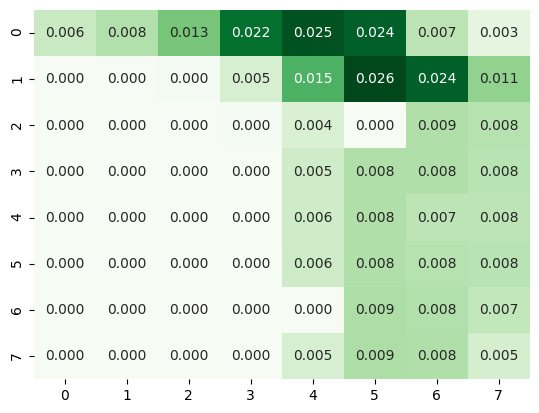

In [23]:
if __name__ == "__main__":
    ag = Agent(matrix_game=matrix_medium, # Ambiente(Matriz) a ser percorrida
                start=(0, 0), # Ponto de início do jogo
                lr=0.001, # Learning Rate: Grau de atualização de peso para estado/ação atual
                gamma=0.9, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
                d_f=0.95, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
                exp_rate=1, # Exploration rate
                max_exp_rate=1, # Exploration probability at start
                min_exp_rate=0.01, # Minimum exploration probability 
                decay_rate=0.01, # Exponential decay rate for exploration prob
                max_steps=5000 # Qtd de passos até jogo ser finalizado
                )

    ag.play(rounds=10000)
    print(ag.showValues())

In [24]:
df_teste = pd.read_excel(r'Resultado_RL_Q_Learning\results_q_learn_dim_8x8_2023-05-14_18-25-13.xlsx', sheet_name = 'results')
df_teste.head()

,Unnamed: 0,JOGO,TIMESTEPS,TIME,STATES,REWARDS,STATES_REWARDS,TOTAL REWARDS,Vtable,Qtable,exp_rate
0,0,0,351,2.969003,"[(0, 0), (0, 0), (1, 0), (1, 0), (1, 1), (1, 0...","[0.0, 0, 0.0, 0, 0.0, 0, 0, 0, 0.0, 0.0, 0.0, ...","[((0, 0), 0.0), ((0, 0), 0), ((1, 0), 0.0), ((...",0.125042,"{0: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5...","{'up': {(0, 0): 0.0, (0, 1): 0.0, (0, 2): 0.0,...",1.000000
1,1,1,307,2.505000,"[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1...","[0.0, 0, 0, 0, 0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, ...","[((0, 0), 0.0), ((0, 0), 0), ((0, 0), 0), ((0,...",0.318832,"{0: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5...","{'up': {(0, 0): 0.0, (0, 1): 0.0, (0, 2): 4.29...",0.990149
2,2,2,296,2.530525,"[(0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0...","[0.0, 0, 0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0...","[((0, 0), 0.0), ((0, 0), 0), ((0, 0), 0), ((0,...",2.121431,"{0: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5...","{'up': {(0, 0): 0.0, (0, 1): 0.0, (0, 2): 1.28...",0.980397
3,3,3,227,1.790010,"[(0, 0), (1, 0), (1, 1), (0, 1), (0, 0), (0, 0...","[0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0.0, 0.0, ...","[((0, 0), 0.0), ((1, 0), 0.0), ((1, 1), 0.0), ...",0.315394,"{0: {0: 6.252798007688122e-32, 1: 1.9001887393...","{'up': {(0, 0): 0.0, (0, 1): 0.0, (0, 2): 1.28...",0.970741
4,4,4,614,4.508799,"[(0, 0), (0, 0), (1, 0), (2, 0), (1, 0), (1, 1...","[0.0, 0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0, 0...","[((0, 0), 0.0), ((0, 0), 0), ((1, 0), 0.0), ((...",0.610241,"{0: {0: 2.968529736550898e-17, 1: 1.7082134643...","{'up': {(0, 0): 0.0, (0, 1): 3.245088380933467...",0.961182


In [25]:
df_teste.tail()

,Unnamed: 0,JOGO,TIMESTEPS,TIME,STATES,REWARDS,STATES_REWARDS,TOTAL REWARDS,Vtable,Qtable,exp_rate
9995,9995,9995,5000,76.264304,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.40725312499999994,...","[((0, 0), 0.0), ((0, 1), 0.0), ((0, 2), 0.0), ...",5.978870,"{0: {0: 0.006301153537800066, 1: 1.35322347629...","{'up': {(0, 0): 8.616498901581998e-05, (0, 1):...",0.01
9996,9996,9996,5000,82.771064,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.40725312499999994,...","[((0, 0), 0.0), ((0, 1), 0.0), ((0, 2), 0.0), ...",5.978870,"{0: {0: 0.006302212743772848, 1: 1.35322347629...","{'up': {(0, 0): 8.616498901581998e-05, (0, 1):...",0.01
9997,9997,9997,5000,76.036155,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.40725312499999994,...","[((0, 0), 0.0), ((0, 1), 0.0), ((0, 2), 0.0), ...",5.978870,"{0: {0: 0.006303273912138045, 1: 1.35322347629...","{'up': {(0, 0): 8.616498901581998e-05, (0, 1):...",0.01
9998,9998,9998,5000,76.686538,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.40725312499999994,...","[((0, 0), 0.0), ((0, 1), 0.0), ((0, 2), 0.0), ...",5.778018,"{0: {0: 0.006304337043911473, 1: 1.35322347629...","{'up': {(0, 0): 8.616498901581998e-05, (0, 1):...",0.01
9999,9999,9999,5000,77.043166,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.40725312499999994,...","[((0, 0), 0.0), ((0, 1), 0.0), ((0, 2), 0.0), ...",5.935241,"{0: {0: 0.006305402140097826, 1: 1.35322347629...","{'up': {(0, 0): 8.616498901581998e-05, (0, 1):...",0.01


donne with configuration: 4x3_lr_0.6_gamma_0.7_d_f_0.8_exp_rate_0.3_max_exp_rate_0.3_min_exp_rate_0.01_decay_rate_0.01_max_steps_200_rounds_100_n_0
exp_rate:  0.3
total reward:  []
steps:  2
game  0  ended in:
0.013010263442993164
exp_rate:  0.3
total reward:  [0.0]
steps:  2
game  1  ended in:
0.03099822998046875
exp_rate:  0.29711445178725876
total reward:  [0.0, 0.0]
steps:  2
game  2  ended in:
0.007997512817382812
exp_rate:  0.294257615258959
total reward:  [0.0, 0.0, 0.0]
steps:  2
game  3  ended in:
0.010002374649047852
exp_rate:  0.29142920472906736
total reward:  [0.0, 0.0, 0.0, 0.0]
steps:  2
game  4  ended in:
0.007000446319580078
exp_rate:  0.2886289373541737
total reward:  [0.0, 0.0, 0.0, 0.0, 0.0]
steps:  2
game  5  ended in:
0.03899574279785156
exp_rate:  0.28585653310520703
total reward:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
steps:  2
game  6  ended in:
0.03201436996459961
exp_rate:  0.28311171473943214
total reward:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
steps:  2
game  7  end

KeyboardInterrupt: 

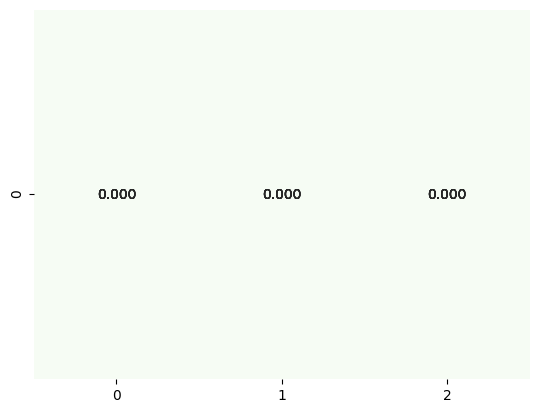

In [67]:
# Iterando por combinações dos parâmetros 20x

matrix_list = [matrix_extra_simple, matrix_simple, matrix_medium] # Ambiente(Matriz) a ser percorrida
lr_list = [0.6, 0.7, 0.8, 0.9] # Learning Rate: Grau de atualização de peso para estado/ação atual
gamma_list = [0.7, 0.8, 0.9, 0.95] # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
d_f_list = [0.8, 0.9, 0.95, 0.99] # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
exp_rate_list = [0.3, 0.5, 0.7, 1] # Exploration rate
min_exp_rate_list = [0.01, 0.2] # Minimum exploration probability 
decay_rate_list = [0.005, 0.01, 0.05, 0.1] # Exponential decay rate for exploration prob
max_steps_list = [200] # Qtd de passos até jogo ser finalizado
rounds_list = [100, 200, 1000, 5000, 10000] # Qtd de jogos

for matrix in matrix_list:
    for lr in lr_list:
        for gamma in gamma_list:
            for d_f in d_f_list:
                for exp_rate in exp_rate_list:
                    for min_exp_rate in min_exp_rate_list:
                        for decay_rate in decay_rate_list:
                            for max_steps in max_steps_list:
                                for rounds in rounds_list:
                                    for n in np.arange(0, 20, 1):
                                        if __name__ == "__main__":
                                            ag = Agent(matrix_game=matrix[0], # Ambiente(Matriz) a ser percorrida
                                                        start=(0, 0), # Ponto de início do jogo
                                                        lr=lr, # Learning Rate: Grau de atualização de peso para estado/ação atual
                                                        gamma=gamma, # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
                                                        d_f=d_f, # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
                                                        exp_rate=exp_rate, # Exploration rate
                                                        max_exp_rate=exp_rate, # Exploration probability at start
                                                        min_exp_rate=min_exp_rate, # Minimum exploration probability 
                                                        decay_rate=decay_rate, # Exponential decay rate for exploration prob
                                                        max_steps=max_steps # Qtd de passos até jogo ser finalizado
                                                        )
                                            print(f"donne with configuration: {matrix.shape[0]}x{matrix.shape[1]}_lr_{lr}_gamma_{gamma}_d_f_{d_f}_exp_rate_{exp_rate}_max_exp_rate_{exp_rate}_min_exp_rate_{min_exp_rate}_decay_rate_{decay_rate}_max_steps_{max_steps}_rounds_{rounds}_n_{n}")
                                            ag.play(rounds=rounds)
                                            print(ag.showValues())


In [60]:
matrix_list = [matrix_extra_simple, matrix_simple, matrix_medium]

In [66]:
for matrix in matrix_list:
    print(matrix.shape)
    count = (matrix[matrix>0]).shape[1]
    print(count)

(4, 3)
3
(5, 5)
8
(8, 8)
23


In [47]:
self.count = (self.ini_reward_matrix[self.ini_reward_matrix>0]).shape[1]

TypeError: '>' not supported between instances of 'list' and 'int'

In [48]:
ex = matrix_list[0][0]

In [49]:
ex

[matrix([[   0. ,    0. ,    0. ],
         [   0. ,    0. ,    0. ],
         [   0. , -100. ,    0.5],
         [   0. ,    0.5,    0.9]])]

In [34]:
matrix_list[0]

[matrix([[   0. ,    0. ,    0. ],
         [   0. ,    0. ,    0. ],
         [   0. , -100. ,    0.5],
         [   0. ,    0.5,    0.9]])]

In [50]:
matrices = [  # list of matrices
    [[1, 2], [3, 4]],
    [[5, 6, 7], [8, 9, 10]],
    [[11, 12], [13, 14], [15, 16]],
]

for matrix in matrices:
    print("Shape of matrix:", matrix.shape)

AttributeError: 'list' object has no attribute 'shape'

In [51]:
matrices = [  # list of NumPy matrix objects
    np.matrix([[1, 2], [3, 4]]),
    np.matrix([[5, 6, 7], [8, 9, 10]]),
    np.matrix([[11, 12], [13, 14], [15, 16]]),
]

for matrix in matrices:
    print("Shape of matrix:", matrix.shape)

Shape of matrix: (2, 2)
Shape of matrix: (2, 3)
Shape of matrix: (3, 2)


In [56]:
matrices[2]

matrix([[11, 12],
        [13, 14],
        [15, 16]])

In [58]:
matrix_list[0]

matrix([[   0. ,    0. ,    0. ],
        [   0. ,    0. ,    0. ],
        [   0. , -100. ,    0.5],
        [   0. ,    0.5,    0.9]])